# Feature Engineering

Özellik Mühendisliği : Özellikler üzerinde gerçekleştirilen çalışmalar. Ham veriden değişken üretmek.

Veri ön İşleme: Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

# Aykırı Değerler (Outliers)

Verideki genel eğilimin oldukça dısına çıkan değerlere denir. Özellikle doğrusal problemlerde aykırı değerlerin etkileri daha şiddetlidir.

Aykırı değerler neye göre belirlenir?
1- Sektör Bilgisi
2- Standart Sapma Yaklaşımı
3- Z-Skoru Yaklaşımı
4- BoxPlot Yöntemi IQR(tek değişken) (biz bu yöntemi kullanacağız) çok değişkende ise (Loft) yöntemini kullanıcaz.

Aykırı Değer Saptama konusunda ana nokta; kabul edilebilir eşik değeri belirlemektir. Bu belirlendikten sonra aykırı değerler bu değerlere göre yakalanır. Eşik değeri ister standart sapma , ister z-skoru istersen de boxplot yöntemine göre belirleyebiliriz.
IQR = Q3(%75 çeyrek) -Q1(%25 çeyrek) 
Median = (%50 çeyrek)
Max Eşik Değeri = ( Q3 + 1.5 * IQR )
Min Eşik Değeri = ( Q1 - 1.5 * IQR )

# Aykırı Değer Yakalama

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler , RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data

df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# Aykırı Değerleri Yakalama

# Grafik Teknikle Aykırı Değerler

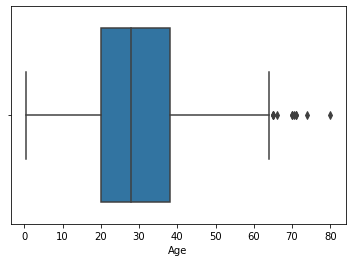

In [5]:
sns.boxplot(x=df["Age"])
plt.show()

# Aykırı Değerler Nasıl Yakalanır?

Eşik değerlere erişmemiz gerekiyor. Bir değişkenin çeyrek değerlerini önce hesaplamalıyız ki onun üzerinden IQR hesabı yapabilelim.

In [6]:
q1 = df["Age"].quantile(0.25)
q1

20.125

In [7]:
q3 = df["Age"].quantile(0.75)
q3

38.0

In [8]:
iqr = q3 - q1
iqr

17.875

In [9]:
up = q3 + 1.5 * iqr
up

64.8125

In [10]:
low = q1 - 1.5 * iqr
low

-6.6875

In [11]:
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [12]:
df[(df["Age"] < low) | (df["Age"] > up)].index # ilgili gözlemlerin indexlerini almak

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

# Aykırı Değer Var mı Yok mu?

In [13]:
df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)  # axis=None = satır-sutun değil hepsine bakmak için

True

In [14]:
df[(df["Age"] < low)].any(axis=None)  # eksi yaş olmadıgı için false gelmesini bekleriz.

False

1. Eşik değer belirledik.
2. Aykırılara eriştik.
3. Hızlıca aykırı değer var mı yok diye sorduk.

# İşlemleri Fonksiyonlaştırmak

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [17]:
outlier_thresholds(df, "Fare")

(-26.724, 65.6344)

In [18]:
low, up = outlier_thresholds(df, "Fare")
low

-26.724

In [19]:
low, up = outlier_thresholds(df, "Fare")
up

65.6344

In [20]:
df[(df["Fare"] < low) | (df["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [21]:
df[(df["Fare"] < low) | (df["Fare"] > up)].index   # aykırı değerlerin indexlerini getir.Problemli değerlerin index bilgilerini getir.

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

check_outlier fonksiyonu outlier var mı yok mu ? bilgisini döndürecek fonksiyon

In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [23]:
check_outlier(df, "Age")

True

In [24]:
check_outlier(df, "Fare")

True

Şimdi öyle bir fonksiyon yapalım ki tek tek sayısal değişkenleri fonksiyona vermek yerine otomatik olarak verisetindeki sayısal değişkenleri seçiyor olsun

# grab_col_names

In [25]:
dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Öyle bir fonksiyon yazmalıyım ki , sayısal değişkenleri, kategorik , kardinal değişkenleri , kategorik olmasa bile aslında kategorik olan değişkenleri getirsin

In [27]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Gözlem): {dataframe.shape[0]}")
    print(f"Variables(Değişken): {dataframe.shape[1]}")
    print(f'cat_cols(kategorik Değişken): {len(cat_cols)}')
    print(f'num_cols(Numerik değişken): {len(num_cols)}')
    print(f'cat_but_car(Kardinal değişken): {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Gözlem): 891
Variables(Değişken): 12
cat_cols(kategorik Değişken): 6
num_cols(Numerik değişken): 3
cat_but_car(Kardinal değişken): 3
num_but_cat: 4


In [29]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [30]:
num_cols

['PassengerId', 'Age', 'Fare']

In [31]:
cat_but_car

['Name', 'Ticket', 'Cabin']

PassengerId bizce numerik değil, exception(istisna) hakim. Date değişkeni olsaydı o da gelecekti. Bunu dışarda bırakalım

In [32]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
num_cols 

['Age', 'Fare']

In [33]:
# Outlier değer var mı ?
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [34]:
#Diğer veri setinde yapalım
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations(Gözlem): 307511
Variables(Değişken): 122
cat_cols(kategorik Değişken): 54
num_cols(Numerik değişken): 67
cat_but_car(Kardinal değişken): 1
num_but_cat: 39


In [35]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [36]:
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

# Aykırı Değerlerin Kendilerine Erişmek

Öyle bir fonksiyon yazalım ki index bilgilerine hatta outlier değişkenlerin kendilerine erişelim

Eğer bir değişkenin outlier değişkenleri 10'dan fazla ise sadece head getirsin

In [37]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10: #shape[0]: gözlem sayısı, shape[1] : değişken sayısı
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [38]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [39]:
age_index = grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Ne yaptık ?? 
1- Outlier threshold hesapladık
2- Sadece bir değişkende outlier var mı yok mu sorduk
3- grab_outliers yaptık. Yani aykırı değerleri yakalamaya calıstık

In [40]:
outlier_thresholds(df, "Age") # 1- Outlier threshold hesapladık

(-6.6875, 64.8125)

In [41]:
check_outlier(df, "Age")  # 2- Sadece bir değişkende outlier var mı yok mu sorduk

True

In [42]:
grab_outliers(df, "Age", True)   # 3- grab_outliers yaptık.

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

# Aykırı Değer Problemini Çözme

 Aykırı değerleri veri tabanından silmek

In [43]:
low, up = outlier_thresholds(df, "Fare")

In [44]:
low

-26.724

In [45]:
up

65.6344

In [46]:
df.shape # kaç tane gözlem var ?

(891, 12)

In [47]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape  #aykırı olmayanların shape i kaç ?

(775, 12)

    Tek bir değişken için aykırı değerleri silebiliyoruz ama bunu tüm değişkenler için yapalım bunun icin fonk yazalım

In [48]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [49]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Gözlem): 891
Variables(Değişken): 12
cat_cols(kategorik Değişken): 6
num_cols(Numerik değişken): 3
cat_but_car(Kardinal değişken): 3
num_but_cat: 4


In [50]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [51]:
df.shape

(891, 12)

In [52]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [73]:
df.shape[0] - new_df.shape[0] 

116

116 tane değişken silinmiş

# Baskılama Yöntemi (re-assignment with thresholds)

In [54]:
low, up = outlier_thresholds(df, "Fare")
low

-26.724

In [55]:
up

65.6344

In [57]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [58]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [61]:
df.loc[(df["Fare"] > up), "Fare"] = up
up

65.6344

In [62]:
df.loc[(df["Fare"] < low), "Fare"] = low
low

-26.724

In [63]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [65]:
df = load()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


In [82]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Gözlem): 891
Variables(Değişken): 12
cat_cols(kategorik Değişken): 6
num_cols(Numerik değişken): 3
cat_but_car(Kardinal değişken): 3
num_but_cat: 4


In [83]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
num_cols

['Age', 'Fare']

In [84]:
df.shape 

(891, 12)

In [85]:
for col in num_cols:
    print(col, check_outlier(df, col))


Age False
Fare True


In [86]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [87]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


# Recap

In [90]:
df = load()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


In [91]:
# aykırı değerleri saptama işlemini yaptık
# Bunun için threshold hesapladık
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [92]:
# aykırı değerleri var mı ? 
check_outlier(df, "Age")

True

In [93]:
# outlier 'ları getir dedik'
grab_outliers(df, "Age", index=True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

 Daha sonra tedavi edelim dedik

In [94]:
# outlier'ları sildik.
remove_outlier(df, "Age").shape

(880, 12)

In [96]:
# threshold'lar ile değiştir yani baskılama yöntemi yap dedik
replace_with_thresholds(df, "Age")

In [97]:
# tekrar kontrol ettik
check_outlier(df, "Age")

False

Outlier'lardan  kurtulmus olduk!!!

# Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor

Tek başına aykırı değer olmayıp, bir başka değişken ile ele alınınca aykırı olan değişkenlere çok değişkenli aykırı değer denir.
3 kere evlenmek aykırı bir değer olmayabilir fakat 17 yasında olup 3 kere evlenmek aykırıdır

Loft Yöntemi : Çok değişkenli aykırı değer belirleme yöntemidir.
Gözlemleri, bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer tanımı yapabilmemizi sağlar.
Bir noktanın lokal yoğunlugu demek, ilgili noktanın etrafındaki komşuluklar demektir. Eğer bir nokta komşuluklarının yoğunlugundan anlamlı bir şekilde düşük ise bu nokta daha seyrek bir bölgededir demekki bu nokta aykırı değer olabilir yorumu yapabiliriz.

Loft yöntemi bize bu komsuluklara göre uzaklık skorları hesaplamımıza sağlar.

In [99]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.230,Ideal,E,SI2,61.500,55.000,326.000,3.950,3.980,2.430
1,0.210,Premium,E,SI1,59.800,61.000,326.000,3.890,3.840,2.310
2,0.230,Good,E,VS1,56.900,65.000,327.000,4.050,4.070,2.310
3,0.290,Premium,I,VS2,62.400,58.000,334.000,4.200,4.230,2.630
4,0.310,Good,J,SI2,63.300,58.000,335.000,4.340,4.350,2.750
5,0.240,Very Good,J,VVS2,62.800,57.000,336.000,3.940,3.960,2.480
6,0.240,Very Good,I,VVS1,62.300,57.000,336.000,3.950,3.980,2.470
7,0.260,Very Good,H,SI1,61.900,55.000,337.000,4.070,4.110,2.530
8,0.220,Fair,E,VS2,65.100,61.000,337.000,3.870,3.780,2.490
9,0.230,Very Good,H,VS1,59.400,61.000,338.000,4.000,4.050,2.390


In [102]:
df = df.select_dtypes(include=['float64', 'int64'])  #sayısal değişkenleri getir
df = df.dropna()  #eksik değerleri sil
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326.000,3.950,3.980,2.430
1,0.210,59.800,61.000,326.000,3.890,3.840,2.310
2,0.230,56.900,65.000,327.000,4.050,4.070,2.310
3,0.290,62.400,58.000,334.000,4.200,4.230,2.630
4,0.310,63.300,58.000,335.000,4.340,4.350,2.750


In [103]:
df.shape

(2068, 7)

In [104]:
for col in df.columns:
    print(col, check_outlier(df, col))
#check_outlier metodunu kullanalım, bu dataframede aykırı değer var mı?

carat True
depth True
table True
price True
x True
y True
z True


In [106]:
#mesela bu aykırı değerlere sahip değişkenlerden sadece bir tanesini seçsek ? Bu carat değişkeninde kaç tane outlier var  bakacak olursak shape atacağız.
low, up = outlier_thresholds(df, "carat")
low

0.5499999999999998

In [107]:
up

0.9500000000000002

In [108]:
df[((df["carat"] < low) | (df["carat"] > up))].shape  #Bu carat değişkeninde kaç tane outlier var  bakacak olursak shape atacağız.
# 1889 tane aykırı değer var diyor. Bu verisetinde Toplam 53940  gözlem var

(436, 7)

In [109]:
low, up = outlier_thresholds(df, "depth")

df[((df["depth"] < low) | (df["depth"] > up))].shape # 2545 tane outlier varmıs

(133, 7)

Outlier threshold 25 'e 75 'likti literatürde. Eğer konuya tek bir değişken üzerinden giderek 25 e 75 lik  outlier silseydik bu sefer ciddi veri kaybı olacaktı. Silmeseydik ise tortu yaratacaktık yani gürültü eklemiş olacaktık.



Şunu unutmamalıyız tek bir değişkene göre baktıgımızda çok sayıda aykırıklar geldi. Bakalım cok değişkenli bakınca nasıl değişecek?

In [110]:
clf = LocalOutlierFactor(n_neighbors=20)
# Yukarıda import ettiğimiz LocalOutlierFactor metodunu getiriyoruz
# burada komsuluk değeri değişebilir. LocalOutlierFactor metodunun default değeri olan 20 değeri tercih edilmeli!

In [111]:
clf.fit_predict(df)  # dediğimizde skorları getirecek,LocalOutlierFactor skorlarını getiriyor olacak

array([1, 1, 1, ..., 1, 1, 1])

In [113]:
df_scores = clf.negative_outlier_factor_  # skorları tutmak için değişkene atıyoruz
df_scores

array([-1.25828131, -1.26933664, -1.29331959, ..., -0.97736224,
       -0.95587687, -1.00884634])

In [114]:
df_scores[0:5]

array([-1.25828131, -1.26933664, -1.29331959, -1.05525469, -1.03691404])

Bu veriler LocalOutlierFactor skorları. Metod bize eksi değerler verdi. Eksi değerlere göre değerlendiriyor olacağız. Basına eksi koayarak pozitif değerlere göre de kullanabilirsiniz. Ama biz negatif değerler ile kullanmayı tercih edeceğiz.

Sebebi: Eşik değere karar vermek için kullanıcı olarak bir bakış gerçekleştirmek istediğimizde oluşturacak olacağımız dirsek yöntemi grafik tekniğinde daha rahat okumak için eksi değerleri ele alacağız.

In [ ]:
# df_scores = -df_scores  istersek pozitif e çevirebiliriz.

In [115]:
np.sort(df_scores)[0:5]  
# Değerlerin 1 ' e yakın olması inlier oldugunu gösterir. Değerlerimiz negatif oldugu için -1 e yakın olması inlieer oldugunu gösterecek. MEsela -10 a gittikce değerlerin outlier oldugunu düşünücez

array([-3.18715386, -2.62781429, -2.45795161, -2.45606488, -2.42224821])

Dirsek Yöntemi : Eşik değer belirlememiz gerekiyor demiştik. Elimde bazı gözlemler ve bunların skorları var .Ve bu skorlara karsılık nereden bölmem gerektiği problemi var. En marjinal değişklik bu nooktada olmus diyebilriz. En dik eğim değişkliğinin oldugu nokta eşik değer olsun yorumunu yapabiliriz. Bu yönteme dirsek yöntemi denir.

In [117]:
scores = pd.DataFrame(np.sort(df_scores))
scores

,0
0,-3.187
1,-2.628
2,-2.458
3,-2.456
4,-2.422
5,-2.394
6,-2.328
7,-2.251
8,-2.148
9,-2.129


<AxesSubplot:>

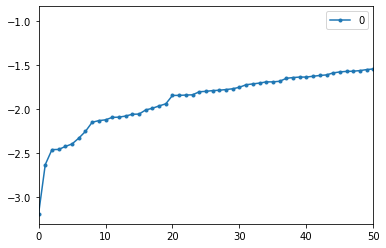

In [118]:
scores.plot(stacked=True, xlim=[0, 50], style='.-')

In [119]:
plt.show()

Grafikte x değerleri gözlemleri , y değerleri ise skorları göstermekte. Bu skorlar outlier skorlarıydı. 


Bu skorlar ne kadar aşağıdaysa ne akdar eksi değerlere sahipse o kadar kötüydü


Dolayısıyla en son gördüğüm noktalardan birini seçebilirm . Mesela 3.indexdeki değeri tercih edebiliriz threshold olarak.

Bu threshold u kullanarak , bu eşik değerden kücük olanları yani aykırı olanları seçebilirim

In [121]:
th = np.sort(df_scores)[3]
th

-2.4560648777965226

In [122]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
91,0.860,55.100,69.000,2757.000,6.450,6.330,3.520
314,0.760,59.000,70.000,2800.000,5.890,5.800,3.460
1275,0.990,58.000,67.000,2949.000,6.570,6.500,3.790


In [123]:
df[df_scores < th].shape   # shape ile kaç tane olduguna bakalım.

(3, 7)

Tek değişkenli baktıgımızda binlerce aykırı değer yakalanmıstı simdi ise 3 tane geldi . Bunlar neden aykırı ??

In [124]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,2068.000,0.709,0.191,0.200,0.230,0.304,0.720,0.800,0.900,1.123,1.520
depth,2068.000,61.781,1.643,53.000,57.500,59.100,61.800,62.600,63.500,66.400,69.500
table,2068.000,57.592,2.362,51.000,53.000,54.000,57.000,59.000,61.000,65.000,70.000
price,2068.000,2607.615,812.917,326.000,351.670,554.000,2879.000,2990.000,3061.000,3105.000,3107.000
x,2068.000,5.661,0.591,3.790,3.970,4.310,5.780,5.950,6.170,6.723,7.530
y,2068.000,5.660,0.579,3.750,3.997,4.310,5.790,5.950,6.130,6.663,7.420
z,2068.000,3.497,0.371,2.270,2.440,2.670,3.560,3.680,3.860,4.173,4.700


In [125]:
df[df_scores < th].index  # istersek outlierların index bilgisini alabiliriz.

Int64Index([91, 314, 1275], dtype='int64')

In [126]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)
# istersek bunları silebiliriz.

,carat,depth,table,price,x,y,z


Gözlem sayısı cok oldugunda baskılama yöntemi kullanmak mantıklı olmayacaktır . Gözlem sayısı az oldugunda çok değişkenli bakıldıktan sonra bu aykırılıklar tespit edilip veri setinden cıkılabilir.